In [ ]:
Simport pandas as pd

# CSV dosyalarını okuma
train = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

print("Train shape:", train.shape)
print("Stores shape:", stores.shape)
print("Features shape:", features.shape)

train.head()


Train shape: (421570, 5)
Stores shape: (45, 3)
Features shape: (8190, 12)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Date kolonunu tarih formatına çevirelim
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# Verileri birleştirelim
data = train.merge(stores, on='Store', how='left')
data = data.merge(features, on=['Store', 'Date', 'IsHoliday'], how='left')

print("Merged data shape:", data.shape)
data.head()


Merged data shape: (421570, 16)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
data.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,270889


In [ ]:
data.describe()

,Store,Dept,Date,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000
std,12.785297,30.492054,NaN,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296


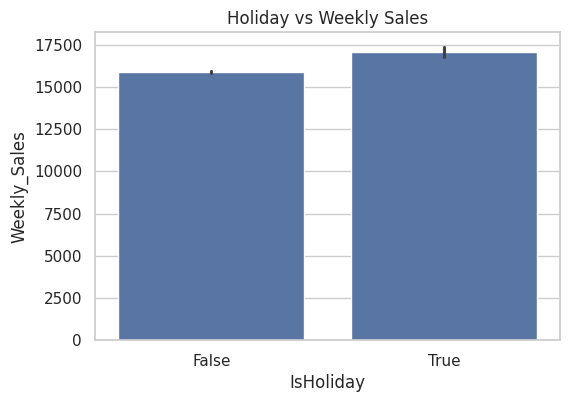

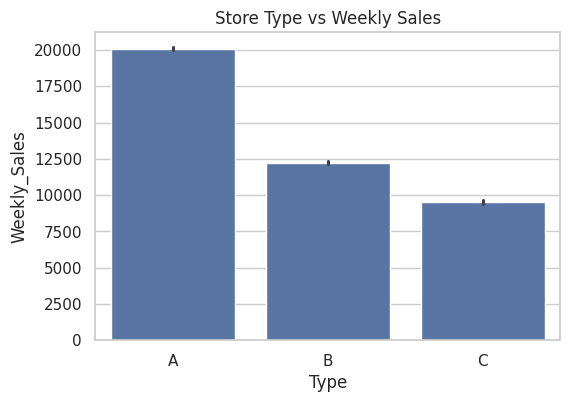

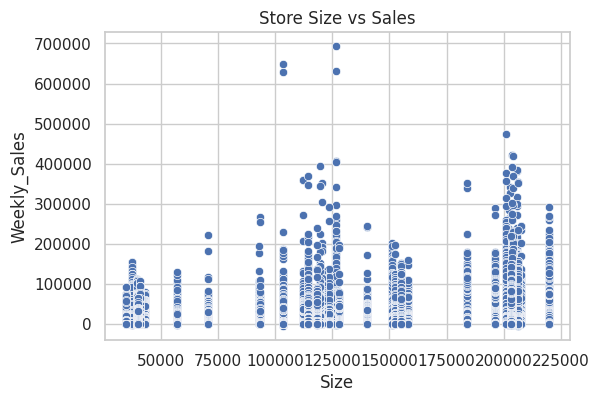

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Tatil etkisi
plt.figure(figsize=(6,4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.title("Holiday vs Weekly Sales")
plt.show()

# Mağaza tipine göre satış
plt.figure(figsize=(6,4))
sns.barplot(x='Type', y='Weekly_Sales', data=data)
plt.title("Store Type vs Weekly Sales")
plt.show()

# Mağaza büyüklüğü - satış ilişkisi
plt.figure(figsize=(6,4))
sns.scatterplot(x='Size', y='Weekly_Sales', data=data)
plt.title("Store Size vs Sales")
plt.show()

In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
data[markdown_cols] = data[markdown_cols].fillna(0)

data.isna().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Type,0
Size,0
Temperature,0
Fuel_Price,0
MarkDown1,0


In [ ]:
# Tarihi parçalara ayırma
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Quarter'] = data['Date'].dt.quarter

# Kategorik Type sütununu sayısal hale getirme
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Type'] = le.fit_transform(data['Type'])

data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Week,DayOfYear,Quarter
0,1,1,2010-02-05,24924.50,False,0,151315,42.31,2.572,0.0,...,0.0,0.0,0.0,211.096358,8.106,2010,2,5,36,1
1,1,1,2010-02-12,46039.49,True,0,151315,38.51,2.548,0.0,...,0.0,0.0,0.0,211.242170,8.106,2010,2,6,43,1
2,1,1,2010-02-19,41595.55,False,0,151315,39.93,2.514,0.0,...,0.0,0.0,0.0,211.289143,8.106,2010,2,7,50,1
3,1,1,2010-02-26,19403.54,False,0,151315,46.63,2.561,0.0,...,0.0,0.0,0.0,211.319643,8.106,2010,2,8,57,1
4,1,1,2010-03-05,21827.90,False,0,151315,46.50,2.625,0.0,...,0.0,0.0,0.0,211.350143,8.106,2010,3,9,64,1


In [ ]:
# Hedef değişken
y = data['Weekly_Sales']

# Özellikler: hedef ve Date dışındaki tüm sayısal sütunlar
X = data.drop(['Weekly_Sales', 'Date'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)

(337256, 19) (84314, 19)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Test verisi üzerinde tahmin
y_pred = model.predict(X_test)

# Hata metrikleri
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE: ", mae)
print("RMSE:", rmse)

MAE:  1442.5014010128807
RMSE: 3680.026831187505


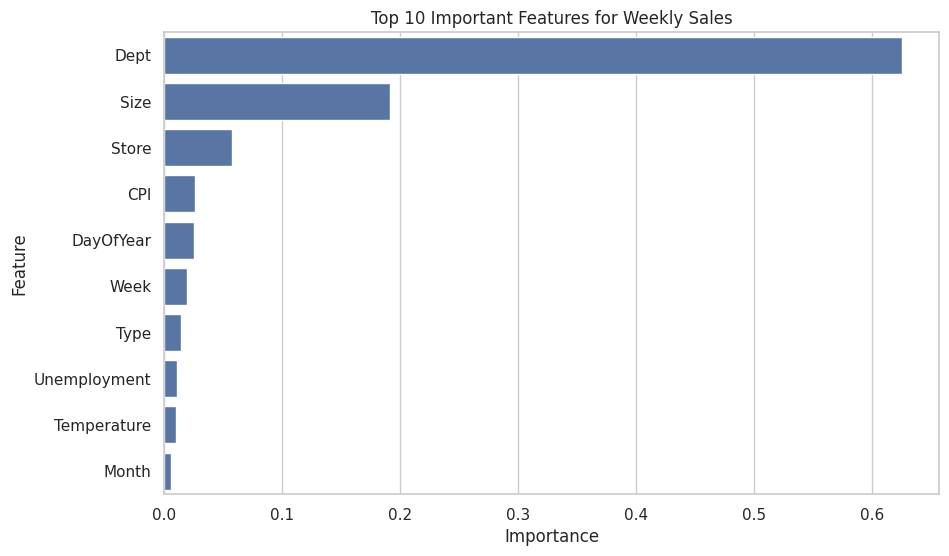

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10))
plt.title("Top 10 Important Features for Weekly Sales")
plt.show()

In [ ]:
model2 = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))

print("Improved Model MAE:", mae2)
print("Improved Model RMSE:", rmse2)

Improved Model MAE: 1528.3822623576332
Improved Model RMSE: 3888.115887273276


In [ ]:
!pip install xgboost
from xgboost import XGBRegressor

model_xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)
import pickle

# Modeli kaydet
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(model_xgb, f)

print("Model başarıyla kaydedildi!")


XGBoost MAE: 1567.7014311536816
XGBoost RMSE: 3179.4650661133155
Model başarıyla kaydedildi!
